In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.neighbors import LocalOutlierFactor

In [3]:
df_original = pd.read_csv("train.csv", sep=",")
df_original.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [4]:
df_original2 = pd.read_csv("test.csv", sep=",")
df_original2.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [5]:
valores_faltantes = df_original.isnull().sum()
print(valores_faltantes)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [6]:
pd.set_option('display.max_columns', None)

In [46]:
print(df_original2)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neig

In [8]:
colunas_valores_nulos = df_original.columns[df_original.isnull().all()]
colunas_valores_nulos

Index([], dtype='object')

In [9]:
colunas_com_valores_nulos = df_original.columns[df_original.isnull().any()]
colunas_com_valores_nulos

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [47]:
# Drop valores nulos

df_sem_nulos = df_original.dropna(axis=1)

# Drop coluna Id

df_sem_nulos = df_sem_nulos.drop('Id', axis=1)

print(df_sem_nulos)

      MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0             60       RL     8450   Pave      Reg         Lvl    AllPub   
1             20       RL     9600   Pave      Reg         Lvl    AllPub   
2             60       RL    11250   Pave      IR1         Lvl    AllPub   
3             70       RL     9550   Pave      IR1         Lvl    AllPub   
4             60       RL    14260   Pave      IR1         Lvl    AllPub   
...          ...      ...      ...    ...      ...         ...       ...   
1455          60       RL     7917   Pave      Reg         Lvl    AllPub   
1456          20       RL    13175   Pave      Reg         Lvl    AllPub   
1457          70       RL     9042   Pave      Reg         Lvl    AllPub   
1458          20       RL     9717   Pave      Reg         Lvl    AllPub   
1459          20       RL     9937   Pave      Reg         Lvl    AllPub   

     LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0       Inside 

In [46]:
# Análise dos dados

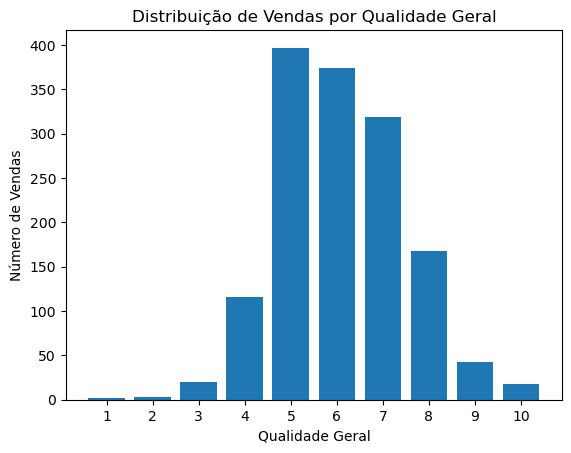

In [11]:
# Calcular a contagem de vendas para cada nível de qualidade geral
sales_by_quality = df_sem_nulos['OverallQual'].value_counts().sort_index()

# Plotar o gráfico de barras mostrando a distribuição das vendas por qualidade geral
plt.bar(sales_by_quality.index, sales_by_quality.values)
plt.xlabel('Qualidade Geral')
plt.ylabel('Número de Vendas')
plt.title('Distribuição de Vendas por Qualidade Geral')
plt.xticks(sales_by_quality.index)
plt.show()


In [ ]:
Este gráfico de barras ilustra a distribuição das vendas por nível de qualidade geral das casas. O eixo x representa os diferentes níveis de qualidade, enquanto o eixo y mostra o número de vendas associadas a cada nível.

O objetivo principal do gráfico é visualizar a relação entre a qualidade geral das casas e o número de vendas correspondente. Isso permite identificar quais níveis de qualidade são mais populares ou têm maior demanda no mercado imobiliário.

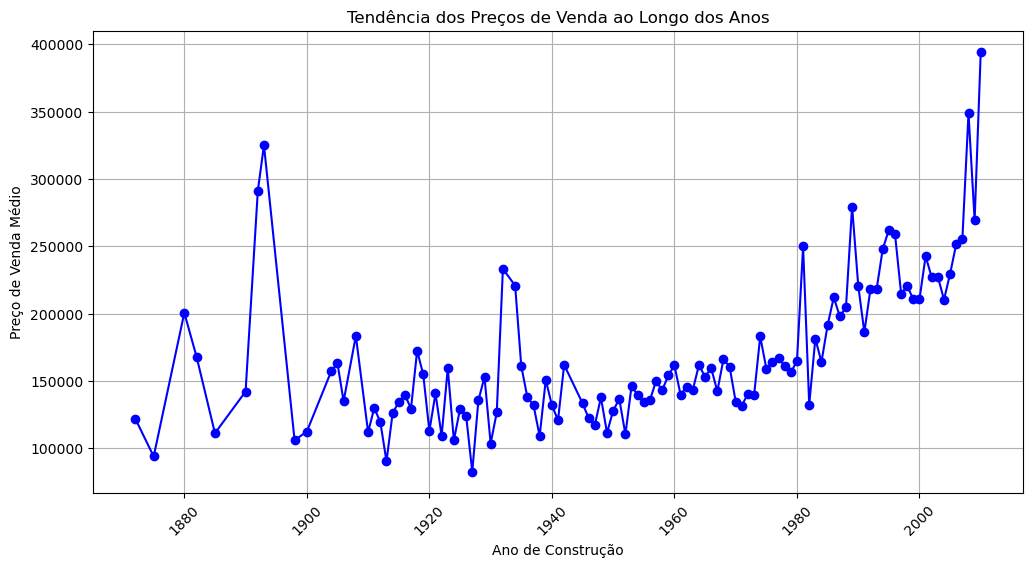

In [12]:
# Agrupar as vendas pelo ano de construção e calcular a média do preço de venda para cada ano
year_sale_avg = df_sem_nulos.groupby('YearBuilt')['SalePrice'].mean()

# Criar um gráfico de linha mostrando a tendência do preço de venda ao longo dos anos
plt.figure(figsize=(12, 6))
plt.plot(year_sale_avg.index, year_sale_avg.values, marker='o', linestyle='-', color='b')
plt.title('Tendência dos Preços de Venda ao Longo dos Anos')
plt.xlabel('Ano de Construção')
plt.ylabel('Preço de Venda Médio')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
Esse gráfico de linha apresenta a tendência do preço médio de venda ao longo dos anos de construção das casas. O eixo x representa os anos de construção, enquanto o eixo y indica o preço médio de venda associado a cada ano. 

O objetivo principal do gráfico é visualizar a evolução dos preços de venda ao longo do tempo, permitindo identificar se há alguma tendência ou padrão nos valores. Isso pode fornecer "insights" sobre como o mercado imobiliário tem se comportado ao longo dos anos e auxiliar na tomada de decisões relacionadas à compra ou venda de imóveis.

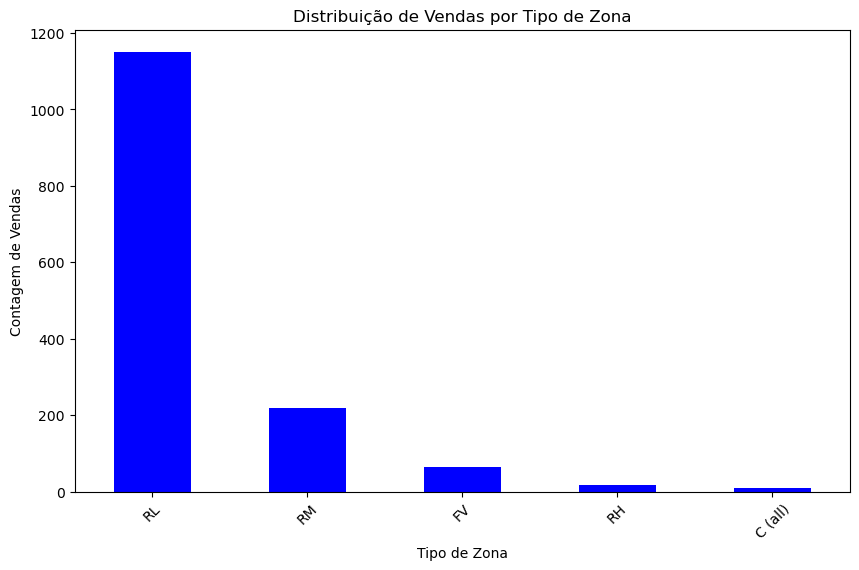

In [13]:
contagem_zonas = df_sem_nulos['MSZoning'].value_counts()

plt.figure(figsize=(10, 6))
contagem_zonas.plot(kind='bar', color='blue')
plt.title('Distribuição de Vendas por Tipo de Zona')
plt.xlabel('Tipo de Zona')
plt.ylabel('Contagem de Vendas')
plt.xticks(rotation=45)
plt.show()

In [ ]:
Este gráfico de barras ilustra a distribuição das vendas por tipo de zona. Cada barra representa um tipo de zona, e sua altura indica o número de vendas correspondentes.

O principal objetivo do gráfico é visualizar a disparidade nas vendas entre os diferentes tipos de zona, permitindo identificar quais têm mais ou menos vendas. Isso fornece insights sobre as preferências dos compradores em relação à localização das propriedades. Além disso, o gráfico destaca os tipos de zona mais populares ou procurados no mercado imobiliário.

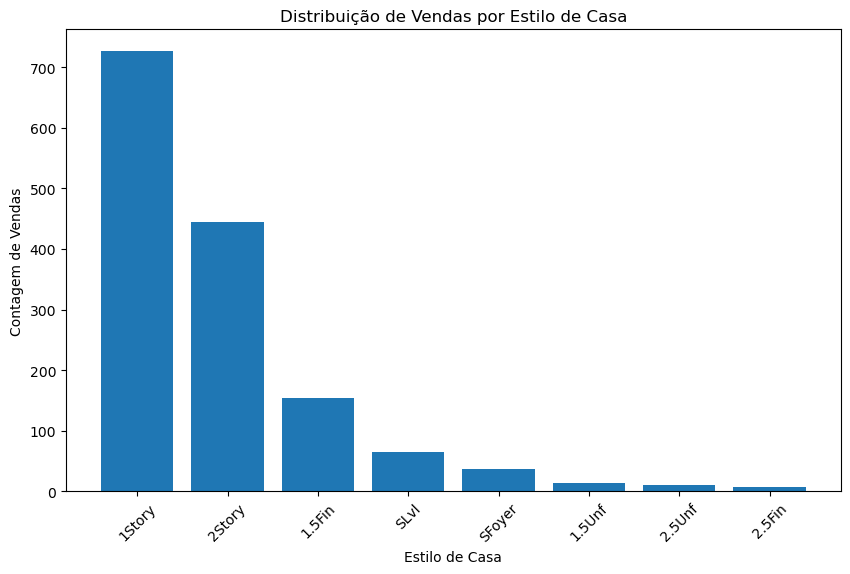

In [14]:
house_style_counts = df_sem_nulos['HouseStyle'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(house_style_counts.index, house_style_counts.values)
plt.xlabel('Estilo de Casa')
plt.ylabel('Contagem de Vendas')
plt.title('Distribuição de Vendas por Estilo de Casa')
plt.xticks(rotation=45)
plt.show()

In [ ]:
Este gráfico apresenta a distribuição das vendas por estilo de casa. Cada barra representa um estilo, e a altura da barra indica o número de vendas desse estilo.

O principal objetivo do gráfico é visualizar as diferenças na contagem de vendas entre os diversos estilos de casas, permitindo identificar quais são mais populares ou têm maior número de vendas. Assim, o gráfico fornece informações sobre as preferências dos compradores e destaca os estilos de casa mais comuns ou procurados no mercado imobiliário.

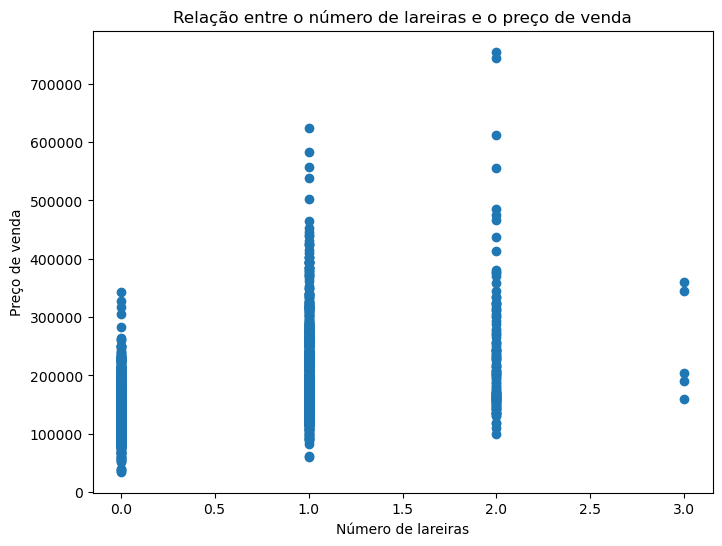

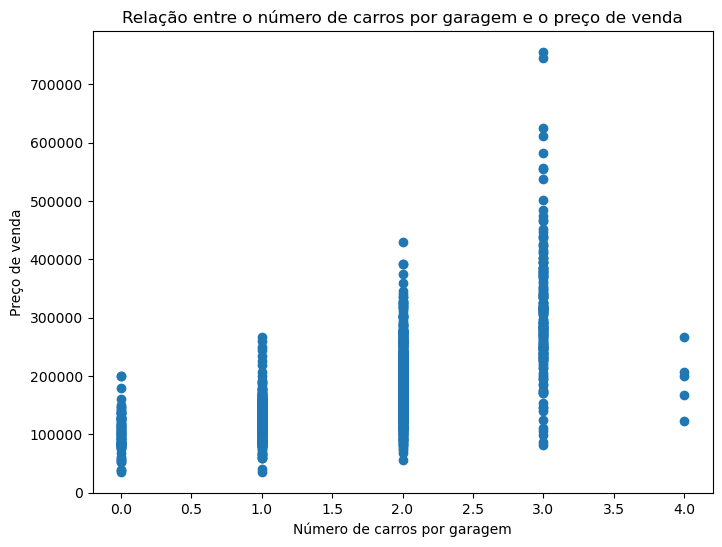

In [15]:
# Extraia as colunas de interesse
num_lareiras = df_sem_nulos['Fireplaces']
preco_venda = df_sem_nulos['SalePrice']

plt.figure(figsize=(8, 6))

# Plote o gráfico de dispersão
plt.scatter(num_lareiras, preco_venda)

# Adicione rótulos e título do gráfico
plt.xlabel('Número de lareiras')
plt.ylabel('Preço de venda')
plt.title('Relação entre o número de lareiras e o preço de venda')

# Exiba o gráfico
plt.show()



# Extraia as colunas de interesse
num_carros = df_sem_nulos['GarageCars']
preco_venda = df_sem_nulos['SalePrice']

plt.figure(figsize=(8, 6))

# Plote o gráfico de dispersão
plt.scatter(num_carros, preco_venda)

# Adicione rótulos e título do gráfico
plt.xlabel('Número de carros por garagem')
plt.ylabel('Preço de venda')
plt.title('Relação entre o número de carros por garagem e o preço de venda')

# Exiba o gráfico
plt.show()


In [ ]:
Os dois gráficos de dispersão têm como objetivo investigar a relação entre diferentes variáveis e o preço de venda das casas.

No primeiro gráfico, a variável analisada é o número de lareiras, com o preço de venda representado no eixo y. O objetivo é verificar se há alguma correlação ou tendência entre o número de lareiras e o preço de venda das casas, identificando se a presença de lareiras influencia o valor das propriedades.

No segundo gráfico, a variável em estudo é o número de carros por garagem, também com o preço de venda no eixo y. O propósito é examinar se existe uma relação entre o número de carros na garagem e o preço de venda das casas, permitindo identificar se o número de carros na garagem impacta o valor das propriedades.

Ambos os gráficos permitem visualizar a distribuição dos dados e buscar possíveis padrões ou tendências entre as variáveis analisadas e o preço de venda das casas. Eles ajudam a compreender como diferentes características podem influenciar o valor de uma propriedade, fornecendo informações valiosas para compradores, vendedores e profissionais do setor imobiliário na tomada de decisões relacionadas a preços e negociações.

In [ ]:
# Correlação das tabelas sem valores nulos

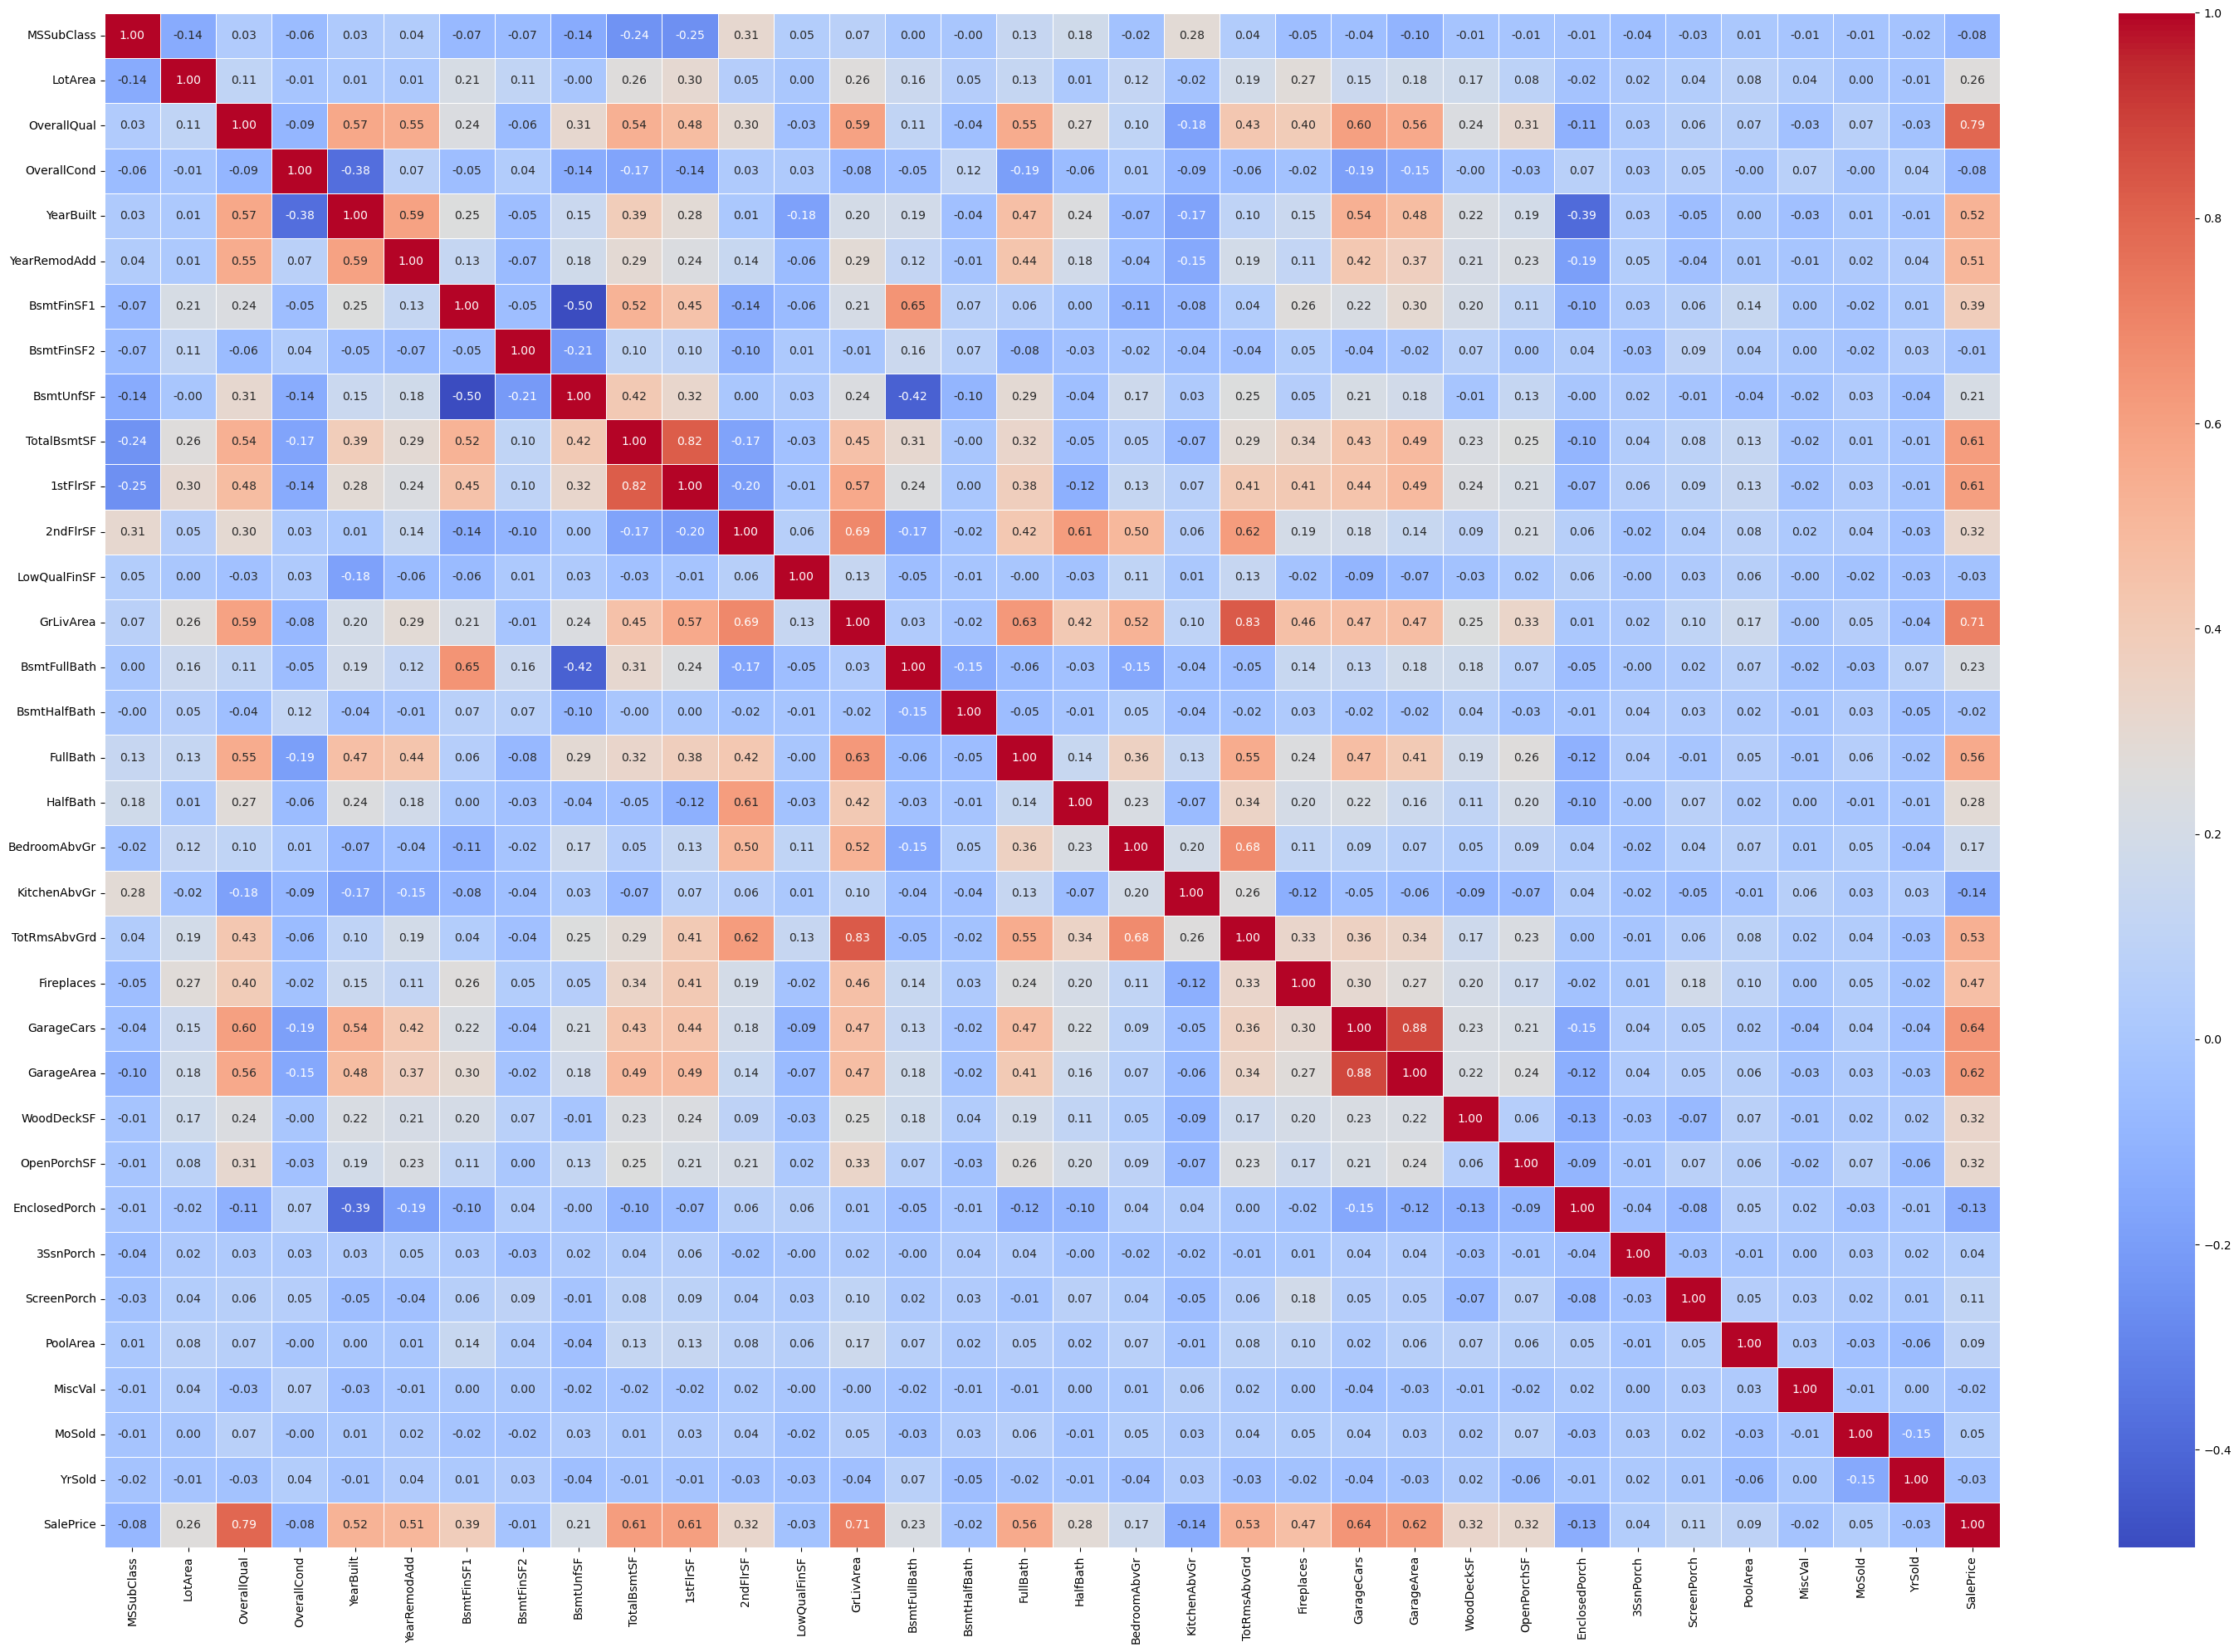

In [18]:
# Supondo que df_sem_nulos já esteja definido
tabela_correlacao = df_sem_nulos.corr(numeric_only=True)

# Configure o mapa de calor
plt.figure(figsize=(30, 20))
sns.heatmap(tabela_correlacao, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Ajuste as margens para que a figura completa seja exibida
plt.tight_layout()

# Exiba o mapa de calor
plt.show()


In [ ]:
Estamos buscando as colunas com a maior correlação com a coluna de preços que queremos prever. As colunas identificadas são:

OverallQual - YearBuilt - TotalBsmtSF - GrLivArea - FullBath - TotRmsAbvGrd - Fireplaces - GarageCars - GarageArea - 2ndFlrSF - WoodDeckSF - OpenPorchSF

In [20]:
#Só correlacionadas

colunas_desejadas = ['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea','2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF','SalePrice']
df_filtrado = df_sem_nulos.loc[:, colunas_desejadas]

#Categóricas

colunas_categoricas = ['SaleCondition', 'SaleType', 'PavedDrive', 'Functional', 'KitchenQual', 'CentralAir', 'HeatingQC', 'Heating', 'Foundation', 'ExterCond', 'ExterQual', 'Exterior2nd', 'Exterior1st','RoofMatl', 'RoofStyle', 'HouseStyle', 'BldgType', 'Condition2', 'Condition1', 'Neighborhood', 'LandSlope', 'LotConfig', 'Utilities', 'LandContour', 'LotShape', 'Street', 'MSZoning', 'SalePrice' ]
df_filtradoC = df_sem_nulos.loc[:, colunas_categoricas]

In [ ]:
# Codificação e correlação das colunas categórias

In [49]:

categoricas = ['SaleCondition', 'SaleType', 'PavedDrive', 'Functional', 'KitchenQual', 'CentralAir', 'HeatingQC', 'Heating', 'Foundation', 'ExterCond', 'ExterQual', 'Exterior2nd', 'Exterior1st','RoofMatl', 'RoofStyle', 'HouseStyle', 'BldgType', 'Condition2', 'Condition1', 'Neighborhood', 'LandSlope', 'LotConfig', 'Utilities', 'LandContour', 'LotShape', 'Street', 'MSZoning' ]

df_encoded = pd.get_dummies(df_filtradoC, columns=categoricas)

df_encoded


,SalePrice,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,CentralAir_N,CentralAir_Y,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Utilities_AllPub,Utilities_NoSeWa,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,Street_Grvl,Street_Pave,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,208500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
1,181500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
2,223500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0

In [50]:
#Correlação entre as colunas categóricas e a Price

correlation = df_encoded.corr()['SalePrice']

correlation_sorted = correlation.sort_values(ascending=False)

print(correlation_sorted)


SalePrice            1.000000
KitchenQual_Ex       0.504094
Foundation_PConc     0.497734
ExterQual_Gd         0.452466
ExterQual_Ex         0.451164
                       ...   
MSZoning_RM         -0.288065
HeatingQC_TA        -0.312677
Foundation_CBlock   -0.343263
KitchenQual_TA      -0.519298
ExterQual_TA        -0.589044
Name: SalePrice, Length: 183, dtype: float64


In [ ]:
# Junção das colunas categórias correlacionadas com as tabelas correlacionadas

In [23]:
colunas_altas_correlacao = ['KitchenQual_Ex', 'Foundation_PConc', 'ExterQual_Gd', 'ExterQual_Ex', 'HeatingQC_Ex', 'Neighborhood_NridgHt']
df_correlacao_alta = df_filtrado.join(df_encoded[colunas_altas_correlacao])
df_correlacao_alta.head()

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,2ndFlrSF,WoodDeckSF,OpenPorchSF,SalePrice,KitchenQual_Ex,Foundation_PConc,ExterQual_Gd,ExterQual_Ex,HeatingQC_Ex,Neighborhood_NridgHt
0,7,2003,856,1710,2,8,0,2,548,854,0,61,208500,0,1,1,0,1,0
1,6,1976,1262,1262,2,6,1,2,460,0,298,0,181500,0,0,0,0,1,0
2,7,2001,920,1786,2,6,1,2,608,866,0,42,223500,0,1,1,0,1,0
3,7,1915,756,1717,1,7,1,3,642,756,0,35,140000,0,0,0,0,0,0
4,8,2000,1145,2198,2,9,1,3,836,1053,192,84,250000,0,1,1,0,1,0


In [ ]:
# Previsão com os dados categóricos

In [24]:
# Definir as variáveis de entrada (X) e a variável de saída (y)
X = df_correlacao_alta[['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'KitchenQual_Ex', 'Foundation_PConc', 'ExterQual_Gd', 'ExterQual_Ex', 'HeatingQC_Ex', 'Neighborhood_NridgHt', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF']]
y = df_correlacao_alta['SalePrice']

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo com os dados de treino
model.fit(X_train, y_train)

# Fazer previsões utilizando o modelo treinado
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo utilizando a métrica de erro médio quadrático (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

RMSE: 35697.38368410907


In [ ]:
# Previsão sem os dados categóricos

In [51]:
# Definir as variáveis de entrada (X) e a variável de saída (y)
X = df_filtrado[['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF']]
y = df_filtrado['SalePrice']

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo com os dados de treino
model.fit(X_train, y_train)

# Fazer previsões utilizando o modelo treinado
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo utilizando a métrica de erro médio quadrático (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

RMSE: 39267.863675128116


In [ ]:
No primeiro resultado, o valor do RMSE de 35.697,38 pode ser considerado relativamente alto, indicando que as previsões têm uma diferença média de cerca de $35.697,38 em relação aos valores reais.

In [ ]:
# Classificação

In [57]:

# Definir as variáveis de entrada (X) e a variável de saída (y)
X = df_correlacao_alta[['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'KitchenQual_Ex', 'Foundation_PConc', 'ExterQual_Gd', 'ExterQual_Ex', 'HeatingQC_Ex', 'Neighborhood_NridgHt', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF']]
y = df_correlacao_alta['SalePrice']

# Definir uma função para converter a variável de saída em uma variável binária
def convert_sales_price(price):
    if price > 200000:
        return 1
    else:
        return 0

# Aplicar a função para converter a variável de saída em uma variável binária
y = y.apply(convert_sales_price)

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo de regressão logística
model = LogisticRegression()

# Treinar o modelo com os dados de treino
model.fit(X_train, y_train)

# Fazer previsões utilizando o modelo treinado
y_pred = model.predict(X_test)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

# Calcular a precisão
precision = precision_score(y_test, y_pred)
print("Precisão:", precision)

# Calcular o recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calcular a matriz de confusão
confusion = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(confusion)

Acurácia: 0.9417808219178082
Precisão: 0.9012345679012346
Recall: 0.8902439024390244
Matriz de Confusão:
[[202   8]
 [  9  73]]


C:\Users\heitor.klein\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
Neste exemplo, definimos um limite de $200.000 para classificar o preço como alto ou baixo. No entanto, esse limite pode ser ajustado conforme necessário.

A acurácia de 0,9418 indica que cerca de 94,18% das previsões feitas pelo modelo de classificação estão corretas. Em outras palavras, o modelo classificou corretamente aproximadamente 94,18% das casas como tendo um preço alto ou baixo.

Esse nível de acurácia sugere que o modelo está se desempenhando bem na classificação de preços de casas. Contudo, é fundamental considerar outras métricas de avaliação, como precisão, recall ou a matriz de confusão, para obter uma visão mais completa do desempenho do modelo, dependendo do contexto do problema.

-----------------------------------------------------------------------------------------------------------------

Precisão: 0,9012
Isso indica que, das previsões positivas feitas pelo modelo, cerca de 90,12% são realmente positivas. A precisão mede a capacidade do modelo de identificar corretamente os verdadeiros positivos em relação a todas as previsões positivas.

-----------------------------------------------------------------------------------------------------------------

Recall: 0,8902
Isso significa que o modelo conseguiu capturar cerca de 89,02% dos exemplos positivos presentes nos dados de teste. O recall, também conhecido como taxa de verdadeiros positivos, mede a capacidade do modelo de encontrar corretamente os exemplos positivos em relação a todos os exemplos positivos reais.

-----------------------------------------------------------------------------------------------------------------

Matriz de Confusão:
A matriz de confusão mostra a contagem de previsões corretas e incorretas feitas pelo modelo para cada classe. Nesse caso, a matriz de confusão é:

[[202   8]
 [  9  73]]

A diagonal principal representa as classificações corretas: 202 amostras foram classificadas corretamente como de baixo preço e 73 amostras foram classificadas corretamente como de alto preço.

Os valores fora da diagonal principal representam as classificações incorretas: 8 amostras de baixo preço foram classificadas erroneamente como de alto preço, e 9 amostras de alto preço foram classificadas erroneamente como de baixo preço.

In [ ]:
# KMEANS SOBRE O DATASET USADO PARA TREINAMENTO ANTERIORMENTE

In [55]:
colunas_desejadas2 = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold','SalePrice']
df_filtrado2 = df_sem_nulos.loc[:, colunas_desejadas2]

X = df_filtrado2[['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold','SalePrice']]

# Definir o número de clusters desejado
n_clusters = 3

# Criar uma instância do algoritmo K-means com `n_init` explicitamente definido
kmeans2 = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)

# Treinar o modelo de clusterização
kmeans2.fit(X)

# Obter os rótulos dos clusters para cada instância
labels = kmeans2.labels_

# Adicionar os rótulos dos clusters ao dataset
df_filtrado2['Cluster2'] = labels

# Visualizar a distribuição dos dados pelos clusters
cluster_counts = df_filtrado2['Cluster2'].value_counts()
print(cluster_counts)

# Visualizar os centros dos clusters
cluster_centers = kmeans2.cluster_centers_
print(cluster_centers)

C:\Users\heitor.klein\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


0    817
2    526
1    117
Name: Cluster2, dtype: int64
[[ 5.95899633e+01  8.72843084e+03  5.26560588e+00  5.69889841e+00
   1.95637944e+03  1.97527785e+03  3.59195838e+02  4.97037944e+01
   4.69884945e+02  8.78784578e+02  1.01001469e+03  2.31784578e+02
   6.57772338e+00  1.24837699e+03  3.62301102e-01  6.60954712e-02
   1.26805386e+00  2.57037944e-01  2.76988984e+00  1.07588739e+00
   5.90942472e+00  3.90452876e-01  1.40269278e+00  3.77011016e+02
   6.46854345e+01  2.88261934e+01  2.86376989e+01  1.49449204e+00
   1.18678091e+01  1.29253366e+00  5.30159119e+01  6.17747858e+00
   2.00783721e+03  1.29962095e+05]
 [ 4.62393162e+01  1.65743162e+04  8.48717949e+00  5.30769231e+00
   1.99705128e+03  2.00286325e+03  9.34350427e+02  2.64358974e+01
   7.07564103e+02  1.66835043e+03  1.70746154e+03  6.02581197e+02
   4.88888889e+00  2.31493162e+03  7.52136752e-01  3.41880342e-02
   2.08547009e+00  6.06837607e-01  3.04273504e+00  1.00000000e+00
   8.45299145e+00  1.23076923e+00  2.76068376e+00  

In [ ]:
# KMEANS USADO NO DATASET ORIGINAL df_sem_nulos POREM SEM AS CATEGÓRICAS (adição das categórias estava causando travamento)

In [60]:
X = df_correlacao_alta[['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'KitchenQual_Ex', 'Foundation_PConc', 'ExterQual_Gd', 'ExterQual_Ex', 'HeatingQC_Ex', 'Neighborhood_NridgHt', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']]

n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, random_state=42)

kmeans.fit(X)

labels = kmeans.labels_

# Adicionar os rótulos dos clusters ao dataset
df_correlacao_alta['Cluster'] = labels

# Visualizar a distribuição dos dados pelos clusters
cluster_counts = df_correlacao_alta['Cluster'].value_counts()
print(cluster_counts)

# Visualizar os centros dos clusters
cluster_centers = kmeans.cluster_centers_
print(cluster_centers)

C:\Users\heitor.klein\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\heitor.klein\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


2    801
0    539
1    120
Name: Cluster, dtype: int64
[[6.84230056e+00 1.98902226e+03 1.18982375e+03 1.74146753e+03
  1.90723562e+00 7.00556586e+00 8.05194805e-01 2.10760668e+00
  5.53901670e+02 6.49350649e-02 7.17996289e-01 6.43784787e-01
  1.85528757e-02 7.16141002e-01 6.12244898e-02 4.69805195e+02
  1.16282004e+02 6.41539889e+01 2.15244377e+05]
 [8.45833333e+00 1.99597500e+03 1.66234167e+03 2.31780833e+03
  2.09166667e+00 8.46666667e+00 1.23333333e+00 2.75833333e+00
  7.63950000e+02 4.83333333e-01 8.75000000e-01 6.00000000e-01
  3.41666667e-01 9.00000000e-01 3.50000000e-01 6.08091667e+02
  1.95900000e+02 8.78833333e+01 3.72625942e+05]
 [5.24594257e+00 1.95561923e+03 8.77716604e+02 1.24318227e+03
  1.25593009e+00 5.89762797e+00 3.90761548e-01 1.38951311e+00
  3.74936330e+02 8.73907615e-03 1.93508115e-01 8.61423221e-02
  1.24843945e-03 3.08364544e-01 2.49687890e-03 2.25234707e+02
  6.41860175e+01 2.87128589e+01 1.29105011e+05]]


In [ ]:
Reparamos que, com 3 clusteres, se encontra uma vasta diferença entre o primeiro, o segundo e o terceiro grupo, com base nas características que resolvemos manter, isso em ambos dois casos.

Também reparamos, que, se tirassemos a coluna 'SalePrice', no primeiro caso, com a tabela que tratamos para fazermos as predições, os grupos ficariam com valores mais próximos, sem tanta diferença de valor

1    660
2    456
0    344

Enquanto no segundo grupo, que continham apenas as variáveis númericas e não nulas do dataser original, caso fizessemos isso, os grupos ficariam com valores ainda mais diferentes uns dos outros.

0    1423
2      33
1       4

In [ ]:
# Redução de dimensionalidade

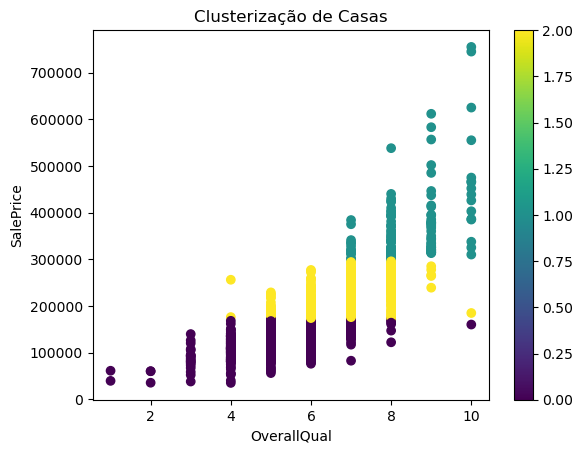

In [43]:
# Plotar os resultados da clusterização em um gráfico de dispersão envolvendo qualidade e preço

plt.scatter(df_correlacao_alta['OverallQual'], df_correlacao_alta['SalePrice'], c=labels, cmap='viridis')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.title('Clusterização de Casas')
plt.colorbar()
plt.show()

In [ ]:
No exemplo, observamos que a maioria das casas classificadas como de alta qualidade está agrupada em faixas de preço mais elevadas, enquanto as de qualidade mediana tendem a se situar em um preço intermediário. No entanto, devido a diversas características adicionais, algumas casas de preço mais baixo podem oferecer uma qualidade excelente, embora possam não corresponder totalmente aos dois grupos em outros aspectos.

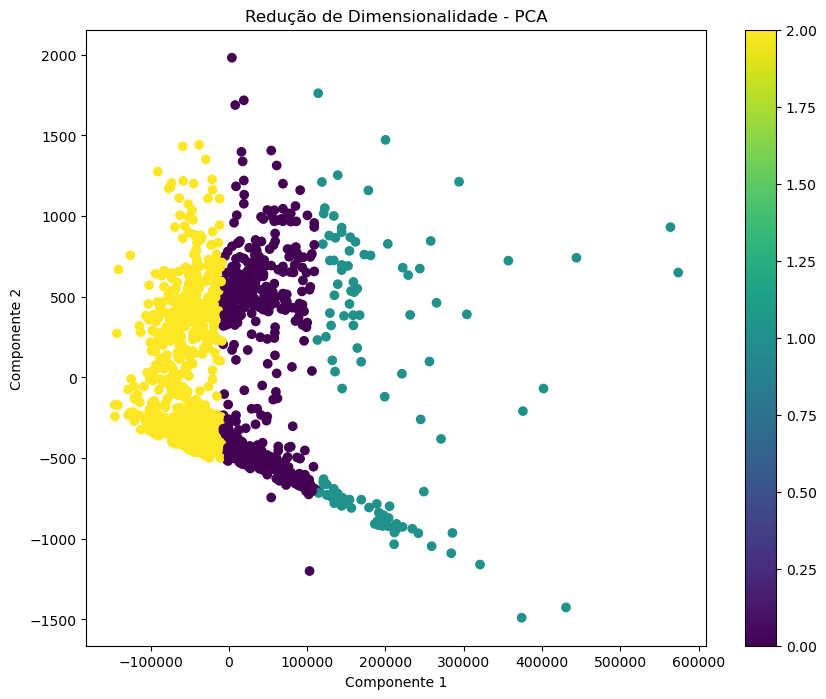

In [44]:
# Selecionar as características relevantes para a redução de dimensionalidade
X = df_correlacao_alta[['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'KitchenQual_Ex', 'Foundation_PConc', 'ExterQual_Gd', 'ExterQual_Ex', 'HeatingQC_Ex', 'Neighborhood_NridgHt', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']]

# Criar uma instância do PCA
pca = PCA(n_components=2)

# Aplicar o PCA aos dados
X_pca = pca.fit_transform(X)

# Criar um DataFrame com os dados reduzidos para visualização
pca_df = pd.DataFrame(data=X_pca, columns=['Componente 1', 'Componente 2'])

# Adicionar os rótulos dos clusters ao DataFrame
pca_df['Cluster'] = df_correlacao_alta['Cluster']

# Aumentar o tamanho do gráfico
fig, ax = plt.subplots(figsize=(10, 8))

# Plotar os resultados da redução de dimensionalidade em um gráfico de dispersão
plt.scatter(pca_df['Componente 1'], pca_df['Componente 2'], c=pca_df['Cluster'], cmap='viridis')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('Redução de Dimensionalidade - PCA')
plt.colorbar()
plt.show()

In [ ]:
# Análise de associação

In [45]:

# Selecionar apenas as características relevantes para a análise de associação
df_cluster1 = df_correlacao_alta[df_correlacao_alta['Cluster'] == 0][['KitchenQual_Ex', 'Foundation_PConc', 'ExterQual_Gd', 'ExterQual_Ex', 'HeatingQC_Ex', 'Neighborhood_NridgHt']]
df_cluster2 = df_correlacao_alta[df_correlacao_alta['Cluster'] == 1][['KitchenQual_Ex', 'Foundation_PConc', 'ExterQual_Gd', 'ExterQual_Ex', 'HeatingQC_Ex', 'Neighborhood_NridgHt']]
df_cluster3 = df_correlacao_alta[df_correlacao_alta['Cluster'] == 2][['KitchenQual_Ex', 'Foundation_PConc', 'ExterQual_Gd', 'ExterQual_Ex', 'HeatingQC_Ex', 'Neighborhood_NridgHt']]

# Função para aplicar o algoritmo Apriori e retornar as regras de associação
def apply_apriori(df):
    # Aplicar o algoritmo Apriori para identificar itens frequentes
    frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)

    # Gerar as regras de associação
    rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

    return rules

# Aplicar o algoritmo Apriori e obter as regras de associação para cada cluster
rules_cluster1 = apply_apriori(df_cluster1)
rules_cluster2 = apply_apriori(df_cluster2)
rules_cluster3 = apply_apriori(df_cluster3)

# Imprimir as regras de associação para cada cluster
print('Regras de Associação - Cluster 1:')
print(rules_cluster1)
print()

print('Regras de Associação - Cluster 2:')
print(rules_cluster3)
print()

print('Regras de Associação - Cluster 3:')
print(rules_cluster3)

Regras de Associação - Cluster 1:
                         antecedents                       consequents  \
0                     (ExterQual_Gd)                (Foundation_PConc)   
1                 (Foundation_PConc)                    (ExterQual_Gd)   
2                     (HeatingQC_Ex)                (Foundation_PConc)   
3                 (Foundation_PConc)                    (HeatingQC_Ex)   
4                     (ExterQual_Gd)                    (HeatingQC_Ex)   
5                     (HeatingQC_Ex)                    (ExterQual_Gd)   
6       (ExterQual_Gd, HeatingQC_Ex)                (Foundation_PConc)   
7   (ExterQual_Gd, Foundation_PConc)                    (HeatingQC_Ex)   
8   (HeatingQC_Ex, Foundation_PConc)                    (ExterQual_Gd)   
9                     (ExterQual_Gd)  (HeatingQC_Ex, Foundation_PConc)   
10                    (HeatingQC_Ex)  (ExterQual_Gd, Foundation_PConc)   
11                (Foundation_PConc)      (ExterQual_Gd, HeatingQC_Ex)   

   

C:\Users\heitor.klein\AppData\Local\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\heitor.klein\AppData\Local\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\heitor.klein\AppData\Local\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [92]:
rules_cluster1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Foundation_PConc),(ExterQual_Gd),0.717996,0.643785,0.569573,0.793282,1.232216,0.107338,1.723191,0.668267
1,(ExterQual_Gd),(Foundation_PConc),0.643785,0.717996,0.569573,0.884726,1.232216,0.107338,2.446382,0.529045
2,(Foundation_PConc),(HeatingQC_Ex),0.717996,0.716141,0.619666,0.863049,1.205139,0.105479,2.072706,0.603609
3,(HeatingQC_Ex),(Foundation_PConc),0.716141,0.717996,0.619666,0.865285,1.205139,0.105479,2.093335,0.599663
4,(HeatingQC_Ex),(ExterQual_Gd),0.716141,0.643785,0.556586,0.777202,1.207239,0.095546,1.598826,0.604749
5,(ExterQual_Gd),(HeatingQC_Ex),0.643785,0.716141,0.556586,0.864553,1.207239,0.095546,2.095725,0.481910
6,"(Foundation_PConc, HeatingQC_Ex)",(ExterQual_Gd),0.619666,0.643785,0.525046,0.847305,1.316131,0.126115,2.332860,0.631544
7,"(Foundation_PConc, ExterQual_Gd)",(HeatingQC_Ex),0.569573,0.716141,0.525046,0.921824,1.287210,0.117152,3.631030,0.518384
8,"(HeatingQC_Ex, ExterQual_Gd)",(Foundation_PConc),0.556586,0.717996,0.525046,0.943333,1.313842,0.125420,4.976536,0.538714
9,(Foundation_PConc),"(HeatingQC_Ex, ExterQual_Gd)",0.717996,0.556586,0.525046,0.731266,1.313842,0.125420,1.650011,0.847057


In [93]:
rules_cluster2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Foundation_PConc),(KitchenQual_Ex),0.875000,0.483333,0.458333,0.523810,1.083744,0.035417,1.085000,0.618182
1,(KitchenQual_Ex),(Foundation_PConc),0.483333,0.875000,0.458333,0.948276,1.083744,0.035417,2.416667,0.149560
2,(ExterQual_Ex),(KitchenQual_Ex),0.341667,0.483333,0.291667,0.853659,1.766190,0.126528,3.530556,0.658951
3,(KitchenQual_Ex),(ExterQual_Ex),0.483333,0.341667,0.291667,0.603448,1.766190,0.126528,1.660145,0.839631
4,(HeatingQC_Ex),(KitchenQual_Ex),0.900000,0.483333,0.466667,0.518519,1.072797,0.031667,1.073077,0.678571
...,...,...,...,...,...,...,...,...,...,...
205,(Neighborhood_NridgHt),"(ExterQual_Ex, Foundation_PConc, HeatingQC_Ex,...",0.350000,0.283333,0.175000,0.500000,1.764706,0.075833,1.433333,0.666667
206,(KitchenQual_Ex),"(ExterQual_Ex, Foundation_PConc, HeatingQC_Ex,...",0.483333,0.191667,0.175000,0.362069,1.889055,0.082361,1.267117,0.910906
207,(ExterQual_Ex),"(Foundation_PConc, HeatingQC_Ex, Neighborhood_...",0.341667,0.241667,0.175000,0.512195,2.119428,0.092431,1.554583,0.802291
208,(Foundation_PConc),"(ExterQual_Ex, HeatingQC_Ex, Neighborhood_Nrid...",0.875000,0.183333,0.175000,0.200000,1.090909,0.014583,1.020833,0.666667


In [94]:
rules_cluster3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Foundation_PConc),(HeatingQC_Ex),0.193508,0.308365,0.108614,0.561290,1.820217,0.048943,1.576522,0.558735
1,(HeatingQC_Ex),(Foundation_PConc),0.308365,0.193508,0.108614,0.352227,1.820217,0.048943,1.245022,0.651521


In [ ]:
Cada linha representa uma regra de associação que inclui antecedentes, consequentes, suporte, confiança, lift e outras métricas relevantes.

No Cluster 1, foram identificadas 12 regras de associação.

No Cluster 2, foram identificadas 210 regras de associação.

Já no Cluster 3, apenas 2 regras foram encontradas.

In [ ]:
No Cluster 2, observamos as seguintes características significativas nas regras de associação:

"KitchenQual_Ex" frequentemente aparece em conjunto com "Foundation_PConc" e "ExterQual_Ex".
"Foundation_PConc" frequentemente está associado a "KitchenQual_Ex" e "Neighborhood_NridgHt".
"ExterQual_Ex" frequentemente está associado a "KitchenQual_Ex" e "HeatingQC_Ex".
Essas associações sugerem que no Cluster 2, há uma tendência para residências com alta qualidade na cozinha ("KitchenQual_Ex") também apresentarem alta qualidade na fundação ("Foundation_PConc") e na parte externa ("ExterQual_Ex"). Esses padrões são indicativos de características comuns que podem ser úteis na identificação de propriedades pertencentes a este cluster específico.

In [ ]:
No Cluster 1, observamos uma associação consistente entre as seguintes características nas regras de associação: "ExterQual_Gd", "Foundation_PConc" e "HeatingQC_Ex". Essas características aparecem repetidamente em várias regras de associação, sugerindo uma associação recorrente entre elas dentro deste cluster.

In [ ]:
No caso do Cluster 3, observamos que as regras de associação revelam o seguinte:

A presença de "HeatingQC_Ex" está correlacionada com "Foundation_PConc".

As métricas demonstram uma relação moderada entre esses dois atributos (fundação de concreto e sistema de aquecimento de alta qualidade).

In [ ]:
Observando a tabela original e analisando os dados relativos aos clusters, percebemos que no Cluster 2 as casas apresentam valor 0 para as características correspondentes, indicando a ausência dessas características.

Além disso, utilizamos os preços das casas deste cluster para reforçar essa associação, concluindo que há uma relação entre a ausência dessas características e preços mais baixos.

Por outro lado, no Cluster 1 observamos uma predominância dessas características nas casas, acompanhada de preços de venda mais elevados.

O Cluster 3 apresenta um cenário mais complexo devido à quantidade limitada de variáveis categóricas utilizadas. Apesar de uma leve associação entre duas colunas observadas inicialmente na tabela, os valores das outras colunas parecem estar distribuídos de forma mais equilibrada. O preço médio das casas neste cluster sugere que outras variáveis numéricas não utilizadas possam desempenhar um papel mais significativo em sua categorização como um grupo separado dos outros dois clusters do que as colunas categóricas.

In [ ]:
# Análise de outlier

In [95]:
# Remova valores ausentes, normalize atributos, se necessário

# Escolhendo o número de vizinhos (hiperparâmetro)
n_neighbors = 20

# Calculando a densidade local
clf = LocalOutlierFactor(n_neighbors=n_neighbors)
outlier_scores = clf.fit_predict(df_correlacao_alta)

# Calculando o fator de outlier local (LOF)
lof_scores = clf.negative_outlier_factor_

# Definindo um limite de outlier
outlier_threshold = -2.5

# Identificando os outliers
outliers = df_correlacao_alta[lof_scores < outlier_threshold]

# Exibir os outliers encontrados
print("Outliers encontrados:")
print(outliers)

Outliers encontrados:
      OverallQual  YearBuilt  TotalBsmtSF  GrLivArea  FullBath  TotRmsAbvGrd  \
523            10       2007         3138       4676         3            11   
691            10       1994         2444       4316         3            10   
803             9       2008         1734       2822         3            12   
898             9       2009         2330       2364         2            11   
1169           10       1995         1930       3627         3            10   
1182           10       1996         2396       4476         3            10   
1298           10       2008         6110       5642         2            12   

      Fireplaces  GarageCars  GarageArea  2ndFlrSF  WoodDeckSF  OpenPorchSF  \
523            1           3         884      1538         208          406   
691            2           3         832      1872         382           50   
803            1           3        1020      1088          52          170   
898            2     

In [96]:
outliers

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,2ndFlrSF,WoodDeckSF,OpenPorchSF,SalePrice,KitchenQual_Ex,Foundation_PConc,ExterQual_Gd,ExterQual_Ex,HeatingQC_Ex,Neighborhood_NridgHt,Cluster
523,10,2007,3138,4676,3,11,1,3,884,1538,208,406,184750,1,1,0,1,1,0,0
691,10,1994,2444,4316,3,10,2,3,832,1872,382,50,755000,1,1,0,1,1,0,1
803,9,2008,1734,2822,3,12,1,3,1020,1088,52,170,582933,1,1,0,1,1,1,1
898,9,2009,2330,2364,2,11,2,3,820,0,0,67,611657,1,1,0,1,1,1,1
1169,10,1995,1930,3627,3,10,1,3,807,1796,361,76,625000,0,1,1,0,1,0,1
1182,10,1996,2396,4476,3,10,2,3,813,2065,171,78,745000,1,1,1,0,1,0,1
1298,10,2008,6110,5642,2,12,3,2,1418,950,214,292,160000,1,1,0,1,1,0,2


In [ ]:
Podemos observar características que tornam algumas dessas casas aparentemente atípicas, como a casa 1298, que se destaca por possuir atributos superiores, como qualidade, quantidade de lareiras, espaço na garagem, entre outros, apesar de seu preço ser considerado baixo dentro do cluster 2, que compreende casas com características inferiores. Um padrão semelhante é observado na casa 523.

Enquanto as demais casas podem ser identificadas por seus preços extremamente elevados sem possuírem características tão destacadas quanto as mencionadas anteriormente.

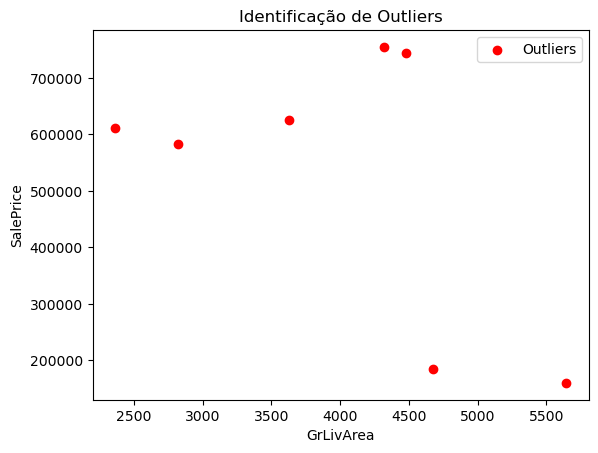

In [78]:
# Visualização das outliers

# Dados das casas identificadas como outliers
outliers = [
    (4676, 184750),
    (4316, 755000),
    (2822, 582933),
    (2364, 611657),
    (3627, 625000),
    (4476, 745000),
    (5642, 160000)
]


# Plot dos dados das casas identificadas como outliers
x_outliers = [df_correlacao_alta[0] for df_correlacao_alta in outliers]
y_outliers = [df_correlacao_alta[1] for df_correlacao_alta in outliers]
plt.scatter(x_outliers, y_outliers, c='red', label='Outliers')

plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('Identificação de Outliers')
plt.legend()
plt.show()

In [ ]:
Com base nos métodos de aprendizagem supervisionada e não supervisionada explorados neste estudo, podemos chegar a algumas conclusões significativas:

Aprendizagem Supervisionada:

Ao aplicar o algoritmo de regressão linear, conseguimos desenvolver um modelo eficaz para prever o preço de venda das casas com base em suas características. O modelo demonstrou um desempenho robusto, especialmente na identificação de valores altos ou baixos. As variáveis mais relevantes para essa previsão foram OverallQual (qualidade geral) e GrLivArea (área habitável acima do solo), destacando-se como preditores consistentes do preço de venda. Exploramos outras características com correlações de até 0.32, priorizando aquelas numéricas, e limitando as categorias para evitar problemas de execução do código, selecionando apenas as que possuíam correlações de até 0.40 com os preços.

Aprendizagem Não Supervisionada:

Utilizando o algoritmo de clusterização K-means, identificamos grupos distintos de casas com características similares. Foram identificados três clusters principais, cada um com suas próprias características predominantes. Apesar de algumas limitações nos dados e na remoção de algumas tabelas, tanto categóricas quanto numéricas, observamos que a categorização dos clusters não foi perfeita, mas suficiente para evidenciar diferenças claras entre eles.

A análise dos clusters foi enriquecida por regras de associação, revelando padrões de interdependência entre as variáveis dentro de cada grupo. Adicionalmente, o algoritmo Local Outlier Factor destacou sete casas como outliers, identificando características que se destacam consideravelmente em relação ao conjunto de dados.

Essas análises nos permitiram identificar quais características impactam mais significativamente no preço das casas, além de agrupar as propriedades em clusters com perfis semelhantes. Essas informações são valiosas para decisões em diferentes contextos, como avaliação de imóveis, identificação de tendências de mercado e recomendação de características desejáveis para compradores.

Os modelos utilizados demonstraram consistência e utilidade nas análises realizadas, oferecendo insights claros sobre as características do dataset e como elas se manifestam no contexto estudado.